In [286]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,roc_auc_score

In [287]:
df = pd.read_csv('nepal_seismicity_master.csv')

In [288]:
df.head()

,dt,lat,lon,depth,mag,place,source,depth_log,lat_offset,lon_offset,year,month_sin,month_cos,hour_sin,hour_cos,rolling_count_7d,rolling_count_30d,rolling_mean_mag_30d,days_since_last_major,is_major
0,1990-01-09 02:29:26.690000+00:00,28.225,88.163,79.1,5.5,"86 km NNW of Mangan, India",usgs,4.383276,-0.487576,3.192907,1990,0.500000,0.866025,0.500000,0.866025,0,0,0.00,3650.000000,1
1,1990-01-10 23:01:21.960000+00:00,26.559,86.663,68.5,4.7,"8 km WNW of R?jbir?j, Nepal",usgs,4.241327,-2.153576,1.692907,1990,0.500000,0.866025,-0.258819,0.965926,1,1,5.50,1.855501,0
2,1990-01-30 15:06:26.080000+00:00,28.599,85.714,52.4,4.5,"74 km NNW of Kod?ri??, Nepal",usgs,3.977811,-0.113576,0.743907,1990,0.500000,0.866025,-0.707107,-0.707107,0,2,5.10,21.525687,0
3,1990-02-09 15:51:23.020000+00:00,29.925,80.730,33.0,4.6,"20 km ENE of D?rchul?, Nepal",usgs,3.526361,1.212424,-4.240093,1990,0.866025,0.500000,-0.707107,-0.707107,0,2,4.60,31.556902,0
4,1990-02-21 07:21:17.300000+00:00,28.082,82.430,33.0,4.8,"14 km ESE of Tuls?pur, Nepal",usgs,3.526361,-0.630576,-2.540093,1990,0.866025,0.500000,0.965926,-0.258819,0,2,4.55,43.202669,0


In [289]:
df.tail()

,dt,lat,lon,depth,mag,place,source,depth_log,lat_offset,lon_offset,year,month_sin,month_cos,hour_sin,hour_cos,rolling_count_7d,rolling_count_30d,rolling_mean_mag_30d,days_since_last_major,is_major
2728,2025-10-21 14:59:40.611000+00:00,29.0245,85.3683,10.000,4.1,"35 km SSE of Saga, China",usgs,2.397895,0.311924,0.398207,2025,-8.660254e-01,0.500000,-0.500000,-0.866025,1,2,4.450000,38.720483,0
2729,2025-11-03 20:57:22.312000+00:00,28.5267,87.3673,10.000,4.7,"84 km NE of Lobuche, Nepal",usgs,2.397895,-0.185876,2.397207,2025,-5.000000e-01,0.866025,-0.866025,0.500000,0,2,4.350000,51.968883,0
2730,2025-11-10 22:44:15.027000+00:00,29.1757,86.8367,10.000,4.2,"136 km N of Lobuche, Nepal",usgs,2.397895,0.463124,1.866607,2025,-5.000000e-01,0.866025,-0.500000,0.866025,0,3,4.466667,59.043104,0
2731,2025-12-04 11:59:01.015000+00:00,29.1109,87.0043,10.000,4.1,"130 km N of Lobuche, Nepal",usgs,2.397895,0.398324,2.034207,2025,-2.449294e-16,1.000000,0.258819,-0.965926,0,1,4.200000,82.595025,0
2732,2025-12-07 02:43:07.342000+00:00,29.8698,80.9384,43.404,4.4,"37 km E of Dārchulā, Nepal",usgs,3.793330,1.157224,-4.031693,2025,-2.449294e-16,1.000000,0.500000,0.866025,1,2,4.150000,85.208987,0


In [290]:
df.shape

(2733, 20)

In [291]:
df.columns

Index(['dt', 'lat', 'lon', 'depth', 'mag', 'place', 'source', 'depth_log',
       'lat_offset', 'lon_offset', 'year', 'month_sin', 'month_cos',
       'hour_sin', 'hour_cos', 'rolling_count_7d', 'rolling_count_30d',
       'rolling_mean_mag_30d', 'days_since_last_major', 'is_major'],
      dtype='object')

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2733 entries, 0 to 2732
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dt                     2733 non-null   object 
 1   lat                    2733 non-null   float64
 2   lon                    2733 non-null   float64
 3   depth                  1536 non-null   float64
 4   mag                    2733 non-null   float64
 5   place                  2733 non-null   object 
 6   source                 2733 non-null   object 
 7   depth_log              1536 non-null   float64
 8   lat_offset             2733 non-null   float64
 9   lon_offset             2733 non-null   float64
 10  year                   2733 non-null   int64  
 11  month_sin              2733 non-null   float64
 12  month_cos              2733 non-null   float64
 13  hour_sin               2733 non-null   float64
 14  hour_cos               2733 non-null   float64
 15  roll

In [293]:
df.describe()

,lat,lon,depth,mag,depth_log,lat_offset,lon_offset,year,month_sin,month_cos,hour_sin,hour_cos,rolling_count_7d,rolling_count_30d,rolling_mean_mag_30d,days_since_last_major,is_major
count,2733.000000,2733.000000,1536.000000,2733.000000,1536.000000,2.733000e+03,2.733000e+03,2733.000000,2733.000000,2733.000000,2733.000000,2.733000e+03,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000
mean,28.712576,84.970093,21.747895,4.410596,2.911921,2.870249e-15,7.092428e-15,2011.497256,0.071770,-0.153503,0.067977,-8.543282e-03,13.035858,49.879985,4.236857,51.564097,0.129162
std,1.583427,2.301202,16.395891,0.492693,0.630717,1.583427e+00,2.301202e+00,8.771611,0.693827,0.700176,0.706897,7.042497e-01,32.531798,101.329635,0.865676,96.851962,0.335441
min,23.710000,69.850000,2.000000,3.000000,1.098612,-5.002576e+00,-1.512009e+01,1990.000000,-1.000000,-1.000000,-1.000000,-1.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.790000,83.278000,10.000000,4.100000,2.397895,-9.225757e-01,-1.692093e+00,2005.000000,-0.500000,-0.866025,-0.707107,-7.071068e-01,0.000000,3.000000,4.221429,4.586994,0.000000
50%,28.310000,85.590000,10.000000,4.300000,2.397895,-4.025757e-01,6.199073e-01,2015.000000,0.500000,-0.500000,0.258819,-1.836970e-16,2.000000,6.000000,4.398995,22.000189,0.000000
75%,29.680000,86.508000,33.000000,4.600000,3.526361,9.674243e-01,1.537907e+00,2016.000000,0.866025,0.500000,0.707107,7.071068e-01,6.000000,26.000000,4.536807,68.381250,0.000000
max,87.840000,89.880000,143.200000,7.800000,4.971201,5.912742e+01,4.909907e+00,2025.000000,1.000000,1.000000,1.000000,1.000000e+00,217.000000,467.000000,5.800000,3650.000000,1.000000


In [294]:
df.nunique()

dt                       2731
lat                      1659
lon                      1925
depth                     370
mag                        44
place                    1290
source                      2
depth_log                 370
lat_offset               1659
lon_offset               1925
year                       36
month_sin                  11
month_cos                  11
hour_sin                   20
hour_cos                   22
rolling_count_7d          145
rolling_count_30d         242
rolling_mean_mag_30d      757
days_since_last_major    2717
is_major                    2
dtype: int64

In [295]:
df.isnull().sum()

dt                          0
lat                         0
lon                         0
depth                    1197
mag                         0
place                       0
source                      0
depth_log                1197
lat_offset                  0
lon_offset                  0
year                        0
month_sin                   0
month_cos                   0
hour_sin                    0
hour_cos                    0
rolling_count_7d            0
rolling_count_30d           0
rolling_mean_mag_30d        0
days_since_last_major       0
is_major                    0
dtype: int64

In [296]:
df.isnull().sum().sum()

2394

In [297]:
df.duplicated().sum()

0

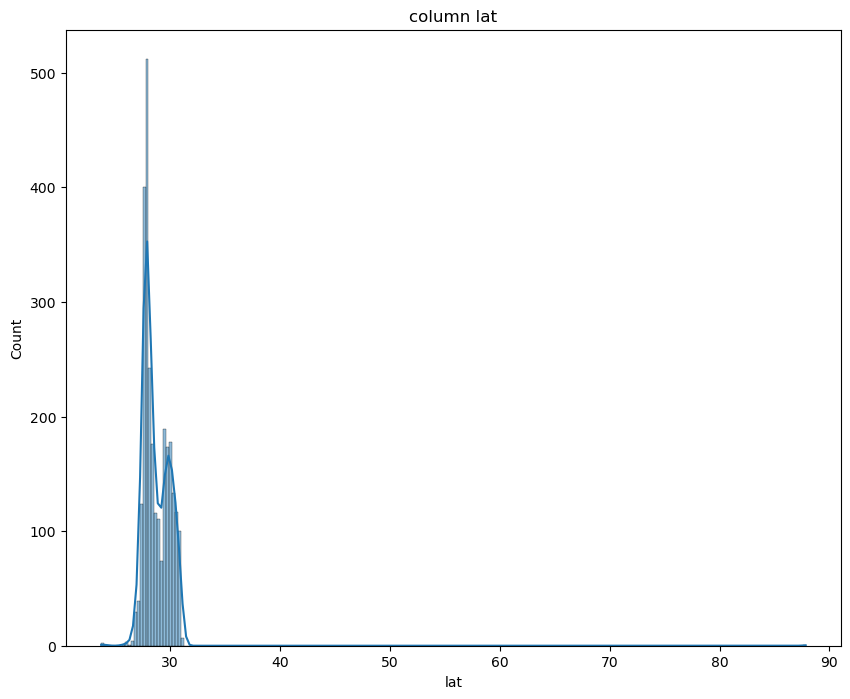

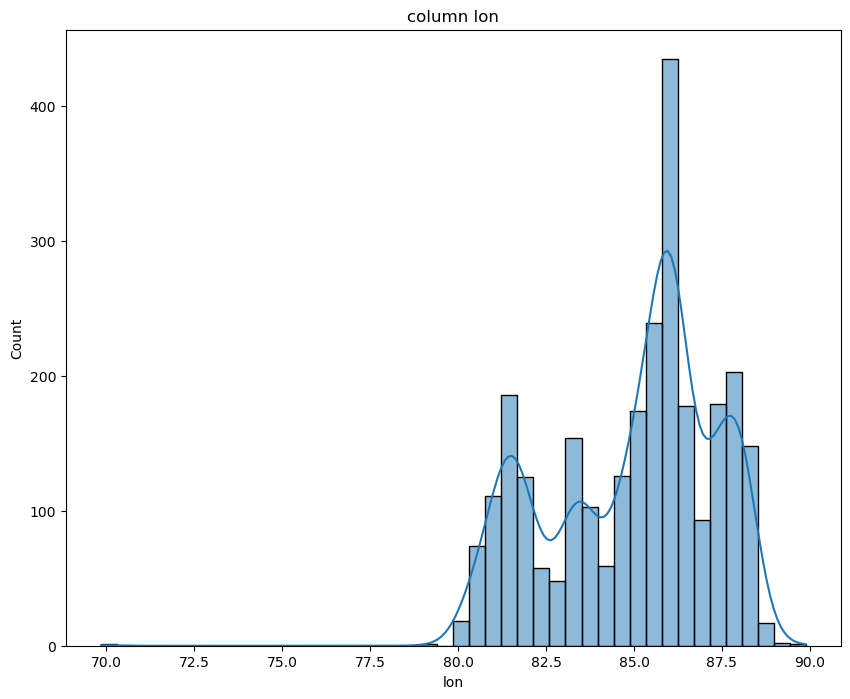

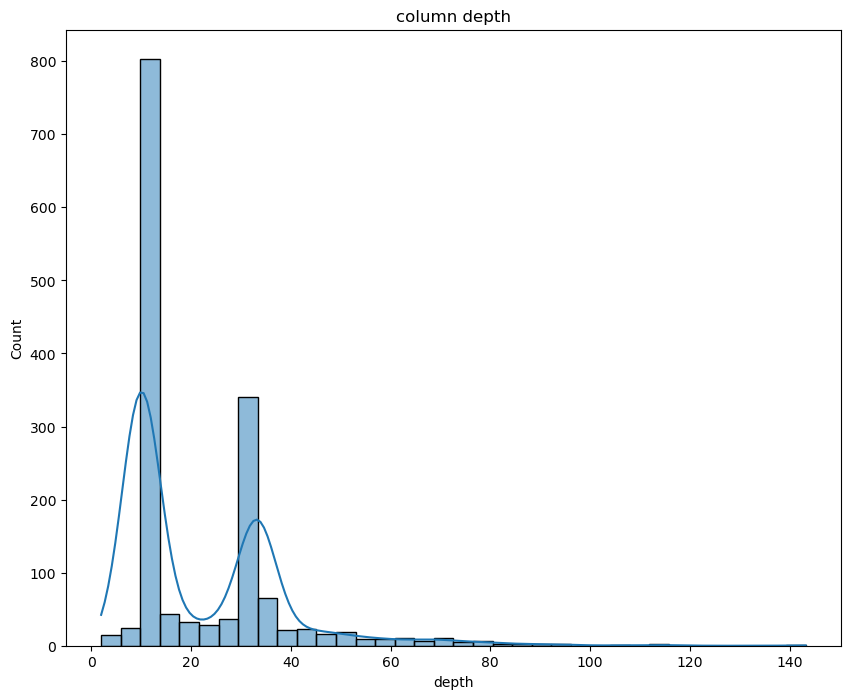

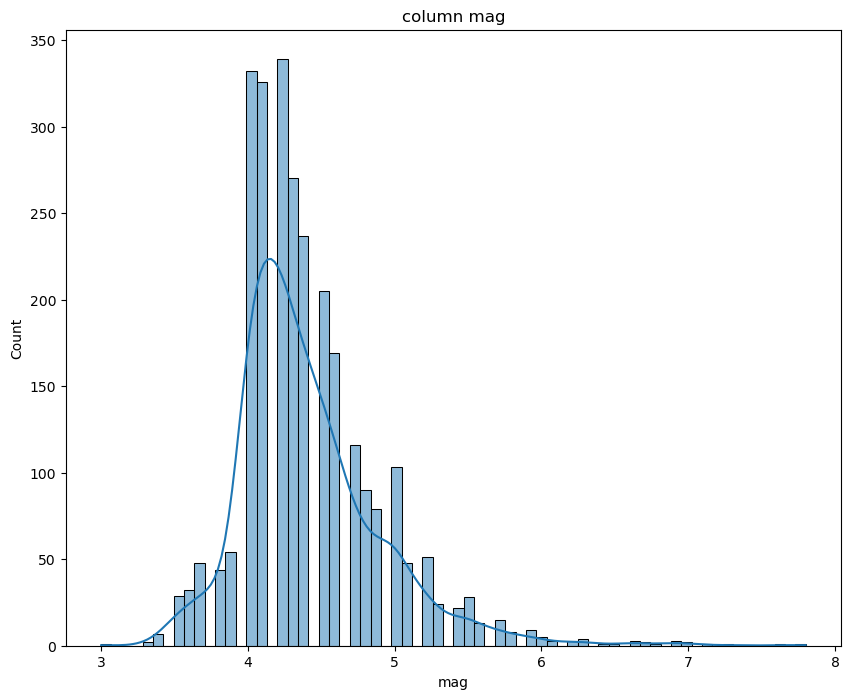

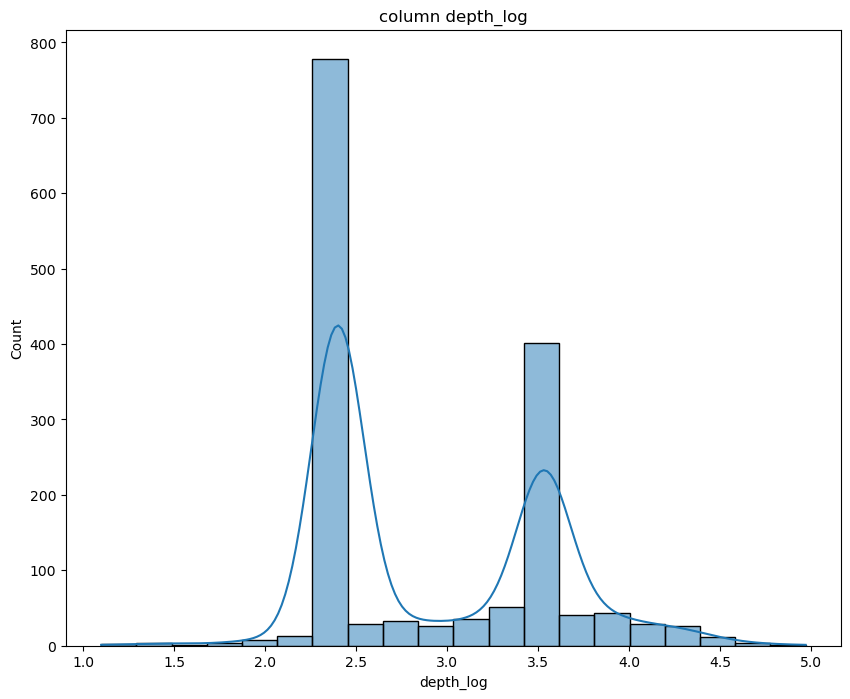

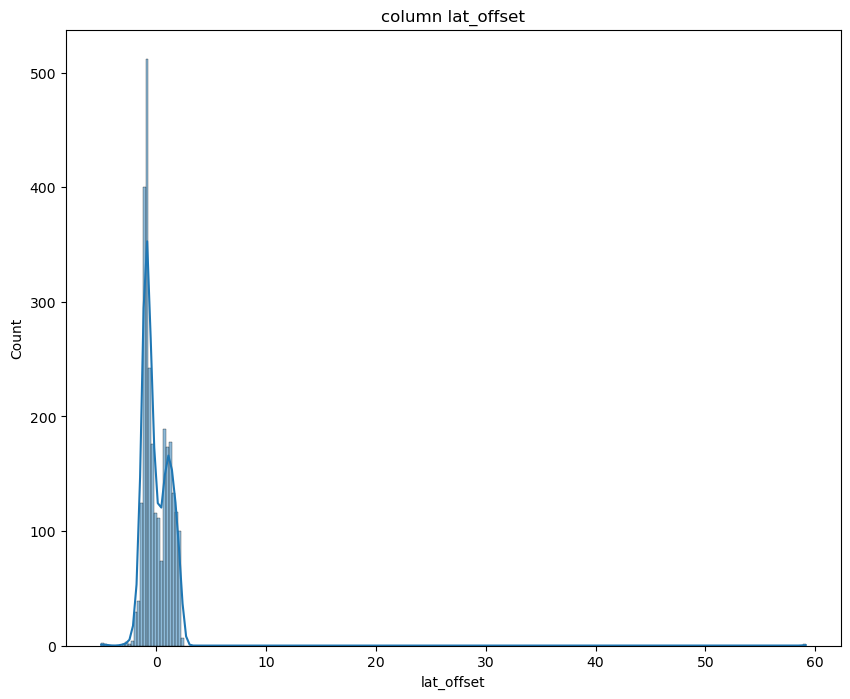

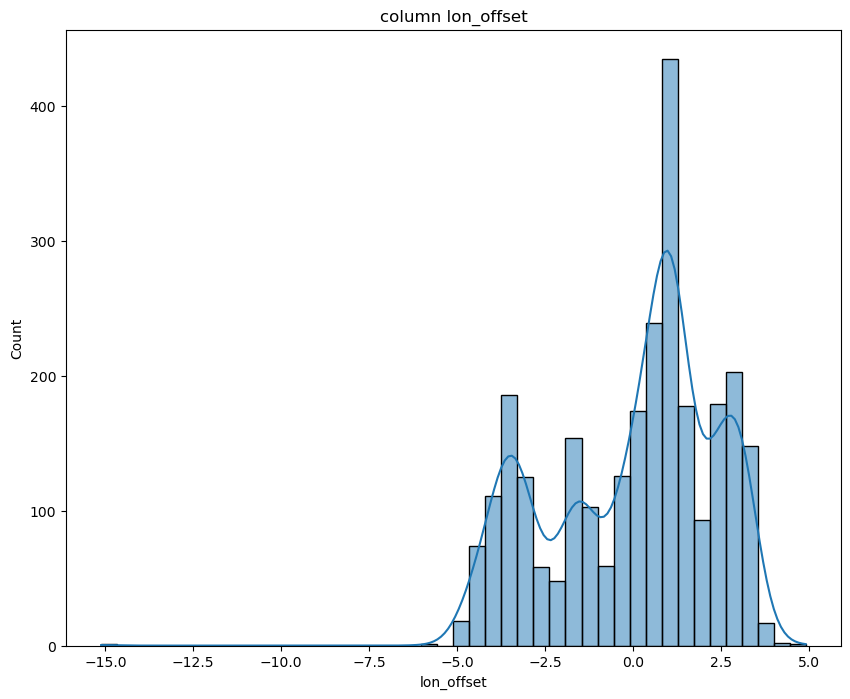

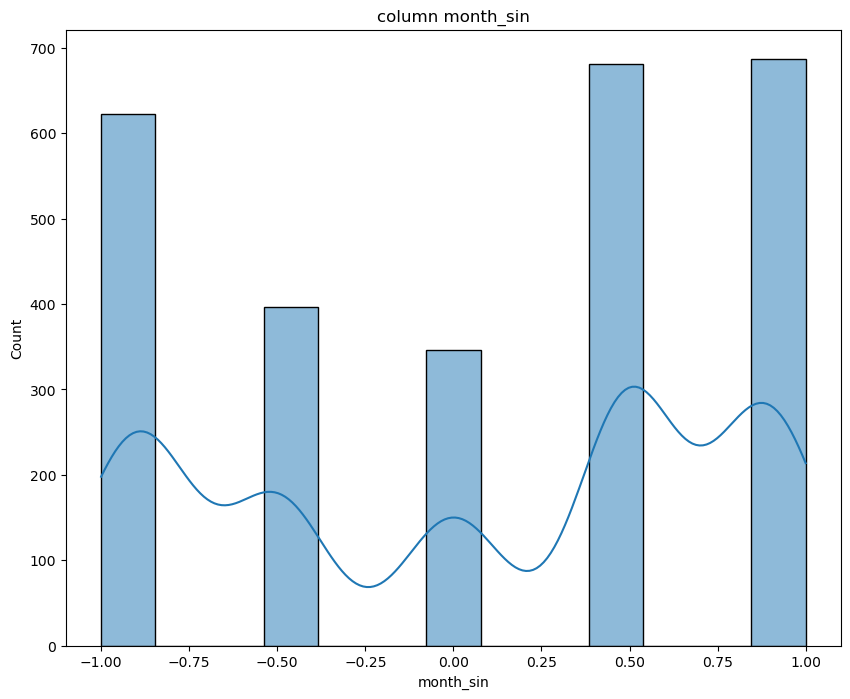

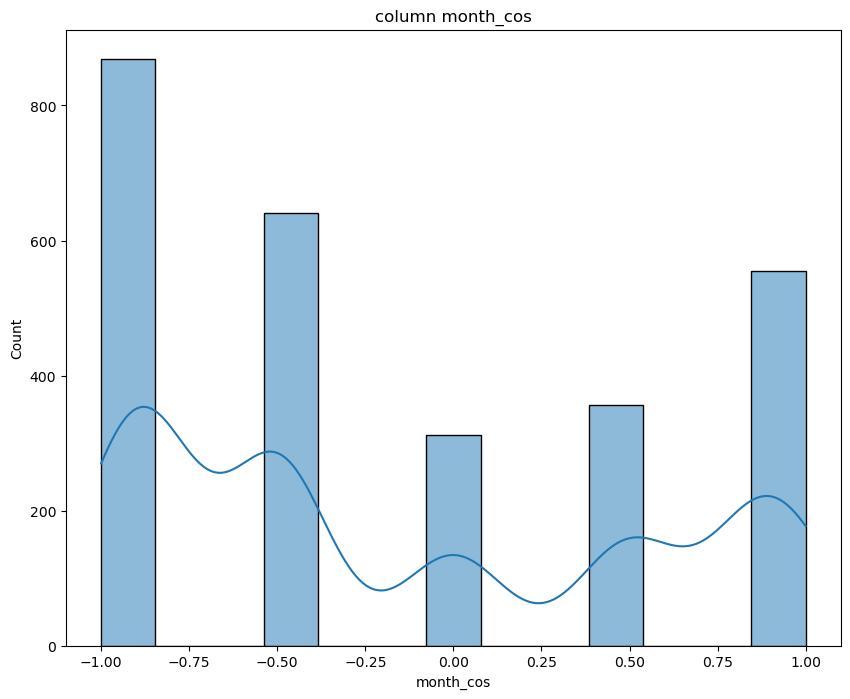

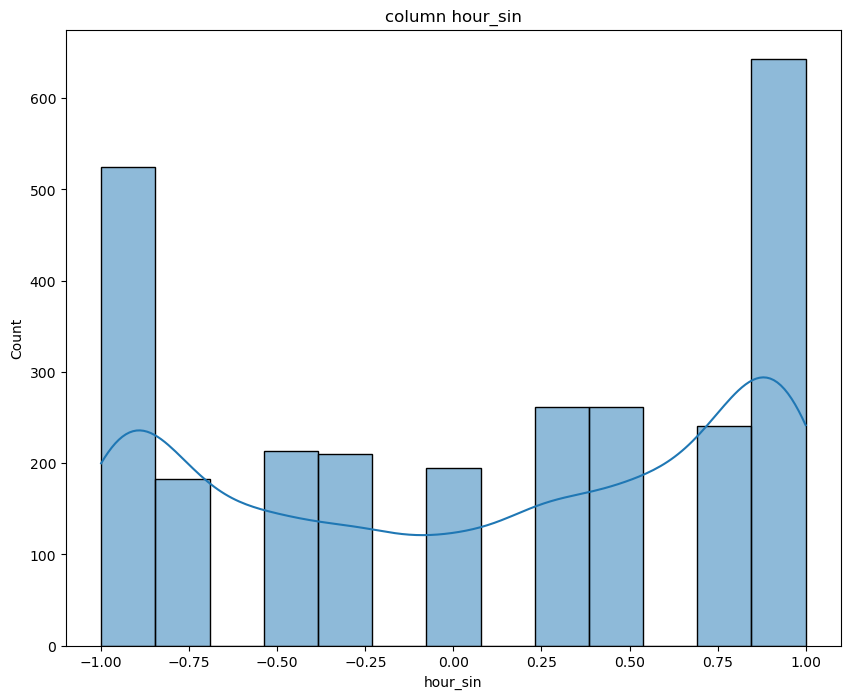

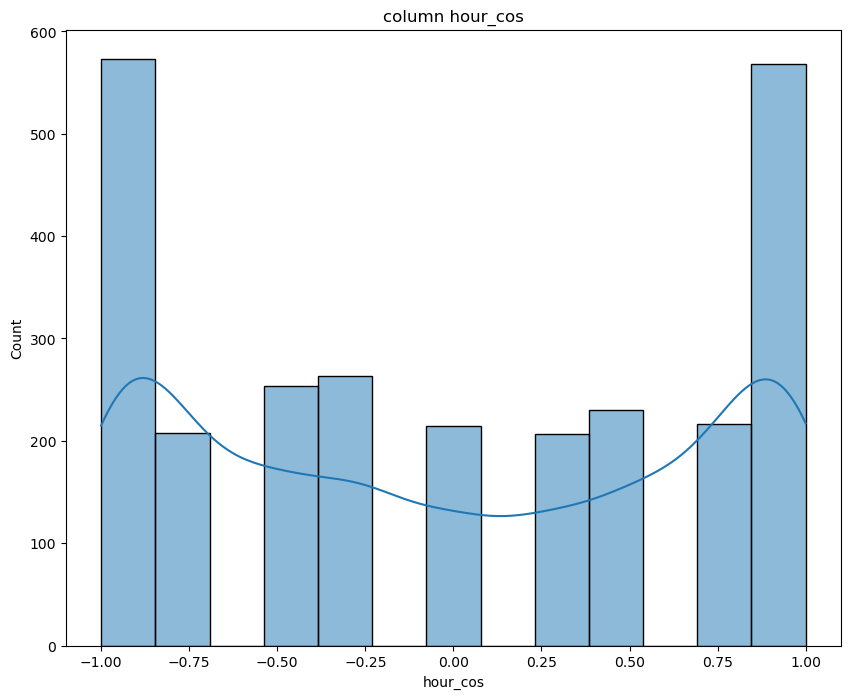

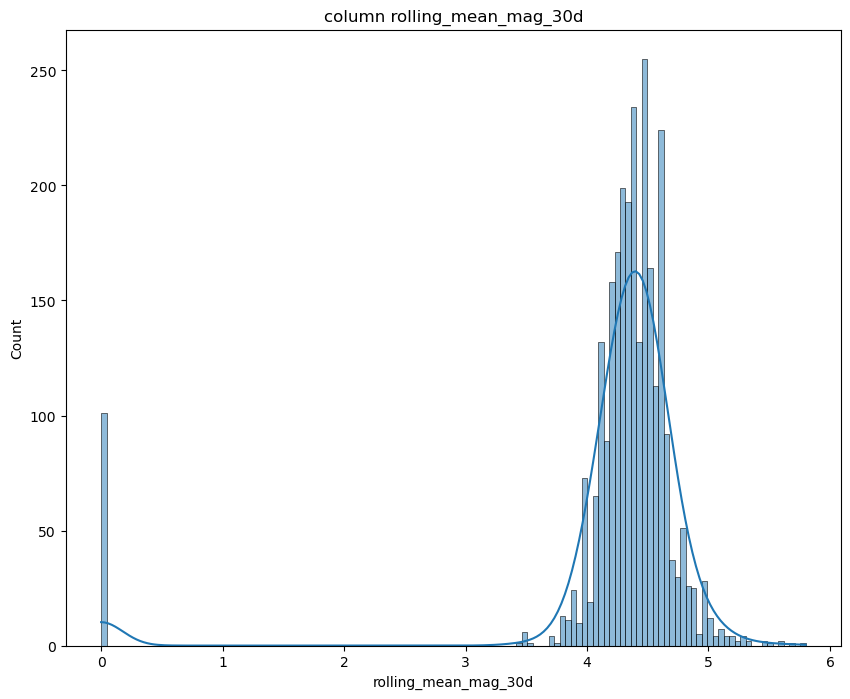

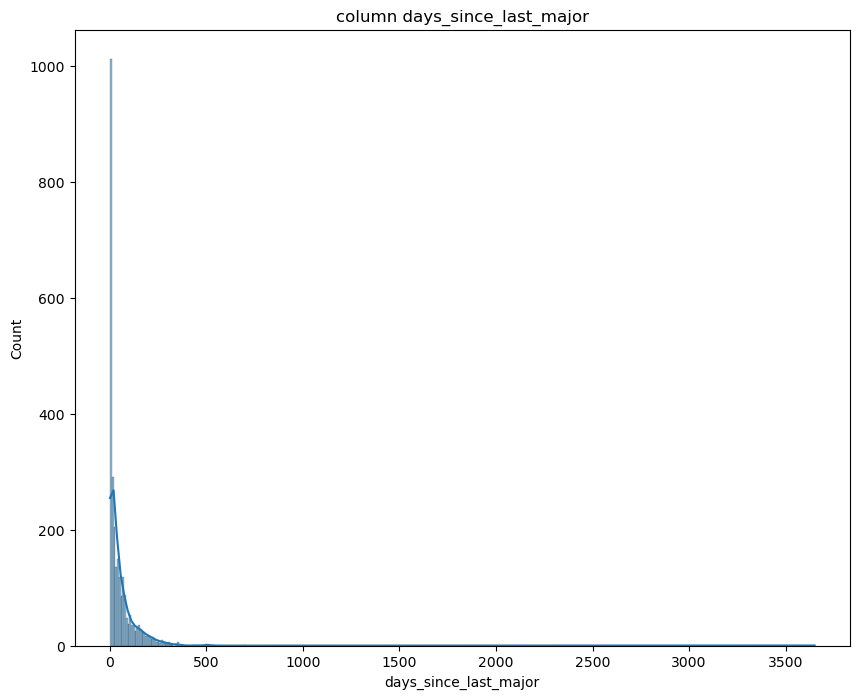

In [298]:
for i in df.select_dtypes('float64','int64').columns:
    plt.figure(figsize=(10,8))
    plt.tight_layout()
    sns.histplot(df[i],kde=True)
    plt.title(f'column {i}')

In [299]:
missing_count = df["depth"].isna().sum()
actual_count = df["depth"].notna().sum()

labels = ["Missing Depth", "Actual Depth"]
sizes = [missing_count, actual_count]


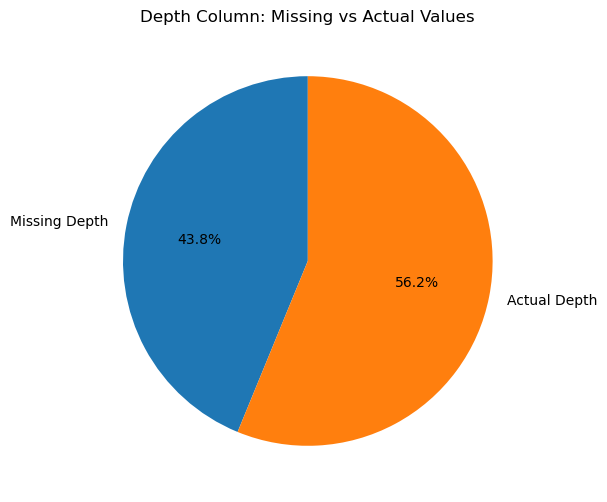

In [300]:
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Depth Column: Missing vs Actual Values")
plt.show()


In [301]:
missing_count_log = df["depth_log"].isna().sum()
actual_count_log = df["depth_log"].notna().sum()

labels2 = ["Missing Depth_log", "Actual Depth_log"]
sizes = [missing_count_log, actual_count_log]


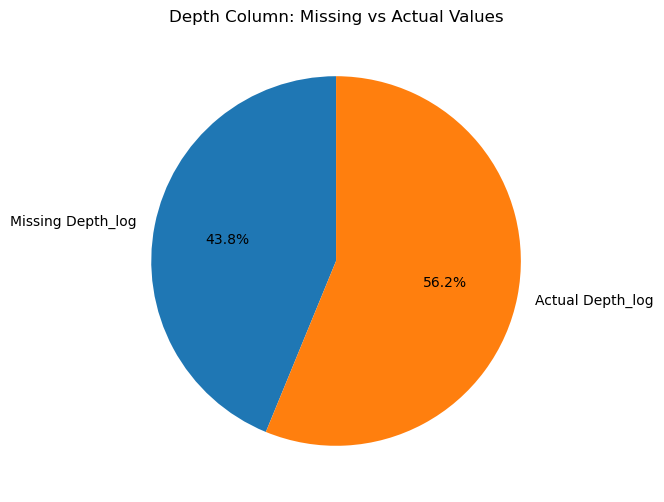

In [302]:
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels2,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Depth Column: Missing vs Actual Values")
plt.show()


In [303]:
df['depth'] = df['depth'].fillna(df['depth'].mean())
df['depth_log'] = df['depth_log'].fillna(df['depth_log'].mean())

In [304]:
df.isnull().sum().sum()

0

In [305]:
cat_cols = df.select_dtypes('object') 

In [306]:
cat_cols

,dt,place,source
0,1990-01-09 02:29:26.690000+00:00,"86 km NNW of Mangan, India",usgs
1,1990-01-10 23:01:21.960000+00:00,"8 km WNW of R?jbir?j, Nepal",usgs
2,1990-01-30 15:06:26.080000+00:00,"74 km NNW of Kod?ri??, Nepal",usgs
3,1990-02-09 15:51:23.020000+00:00,"20 km ENE of D?rchul?, Nepal",usgs
4,1990-02-21 07:21:17.300000+00:00,"14 km ESE of Tuls?pur, Nepal",usgs
...,...,...,...
2728,2025-10-21 14:59:40.611000+00:00,"35 km SSE of Saga, China",usgs
2729,2025-11-03 20:57:22.312000+00:00,"84 km NE of Lobuche, Nepal",usgs
2730,2025-11-10 22:44:15.027000+00:00,"136 km N of Lobuche, Nepal",usgs
2731,2025-12-04 11:59:01.015000+00:00,"130 km N of Lobuche, Nepal",usgs


In [307]:
df['source'].value_counts()

source
usgs    1536
nsc     1197
Name: count, dtype: int64

In [308]:
df['place'].value_counts()

place
Dolakha                        194
Sindhupalchowk                 100
Bajhang                         75
Sindhupalchok                   58
Bajura                          57
                              ... 
2 km N of Dipayal, Nepal         1
28 km NE of Dipayal, Nepal       1
64 km NNW of Lobujya, Nepal      1
98 km ENE of Lobujya, Nepal      1
37 km E of Dārchulā, Nepal       1
Name: count, Length: 1290, dtype: int64

In [309]:
df = df.drop(columns=["place","dt"])

In [310]:
y= df["is_major"]
X = df.drop(columns='is_major')

In [311]:
X_test, X_train, y_test, y_train = train_test_split(X,y,test_size=0.2,random_state=42)

In [312]:
le = LabelEncoder()
X_train["source"] = le.fit_transform(X_train["source"])
X_test["source"] = le.transform(X_test["source"])

In [313]:
X_test

,lat,lon,depth,mag,source,depth_log,lat_offset,lon_offset,year,month_sin,month_cos,hour_sin,hour_cos,rolling_count_7d,rolling_count_30d,rolling_mean_mag_30d,days_since_last_major
347,30.0340,88.0810,33.000000,4.6,1,3.526361,1.321424,3.110907,1998,-0.866025,-0.500000,0.866025,0.500000,14,18,4.394444,1.256705
1321,28.1447,84.6237,10.000000,4.2,1,2.397895,-0.567876,-0.346393,2015,0.866025,-0.500000,0.500000,-0.866025,5,6,4.616667,3.624142
1578,28.0300,86.3600,21.747895,4.1,0,2.911921,-0.682576,1.389907,2015,0.500000,-0.866025,0.866025,-0.500000,28,286,4.476084,4.102083
2524,28.9400,82.2400,21.747895,4.2,0,2.911921,0.227424,-2.730093,2023,-0.500000,0.866025,0.707107,-0.707107,0,25,4.656000,12.921528
2722,29.9566,84.4391,10.000000,4.6,1,2.397895,1.244024,-0.530993,2025,-0.866025,-0.500000,0.500000,0.866025,3,4,4.150000,106.203179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,27.6300,86.1700,21.747895,4.5,0,2.911921,-1.082576,1.199907,2015,0.500000,-0.866025,0.866025,0.500000,43,303,4.486667,1.016667
1095,30.2120,83.0020,35.000000,4.0,1,3.583519,1.499424,-1.968093,2011,-0.500000,0.866025,0.000000,1.000000,2,5,4.200000,2.027893
1130,29.9140,88.0110,10.000000,4.9,1,2.397895,1.201424,3.040907,2012,-0.500000,-0.866025,-0.965926,0.258819,2,7,4.485714,24.470612
1294,27.6429,85.1600,10.000000,4.9,1,2.397895,-1.069676,0.189907,2015,0.866025,-0.500000,0.866025,-0.500000,5,6,4.616667,3.520009


In [314]:
preprocessor = ColumnTransformer(
    transformers=[
        ('std',StandardScaler(),X_test.columns)
        
    ],
    remainder='passthrough'
)

In [315]:
preprocessor.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('std', StandardScaler(),
                                 Index(['lat', 'lon', 'depth', 'mag', 'source', 'depth_log', 'lat_offset',
       'lon_offset', 'year', 'month_sin', 'month_cos', 'hour_sin', 'hour_cos',
       'rolling_count_7d', 'rolling_count_30d', 'rolling_mean_mag_30d',
       'days_since_last_major'],
      dtype='object'))])

In [316]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.fit_transform(X_test)

In [317]:
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
y_prob_log = log_reg.predict_proba(X_test_scaled)[:, 1]
print("Logistic Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Accuracy: 0.9830741079597438
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1901
           1       0.89      0.99      0.94       285

    accuracy                           0.98      2186
   macro avg       0.95      0.99      0.96      2186
weighted avg       0.98      0.98      0.98      2186



In [318]:
acc = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    acc.append(knn.score(X_test_scaled, y_test))

best_k = acc.index(max(acc)) + 1
print("Best K:", best_k)

Best K: 3


In [319]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.918572735590119
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1901
           1       0.86      0.45      0.59       285

    accuracy                           0.92      2186
   macro avg       0.89      0.72      0.77      2186
weighted avg       0.91      0.92      0.91      2186



In [320]:

svm = SVC(kernel="rbf", C=1, gamma="scale",probability=True)

svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
y_prob_svm = svm.predict_proba(X_test_scaled)[:, 1]

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9551692589204026
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1901
           1       0.97      0.67      0.80       285

    accuracy                           0.96      2186
   macro avg       0.96      0.84      0.89      2186
weighted avg       0.96      0.96      0.95      2186



In [321]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "KNN", "SVM"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_svm)
    ]
})

results

,Model,Accuracy
0,Logistic Regression,0.983074
1,KNN,0.918573
2,SVM,0.955169


In [322]:

roc_log = roc_auc_score(y_test, y_prob_log)
roc_knn = roc_auc_score(y_test, y_prob_knn)
roc_svm = roc_auc_score(y_test, y_prob_svm)

print("Logistic ROC–AUC:", roc_log)
print("KNN ROC–AUC:", roc_knn)
print("SVM ROC–AUC:", roc_svm)

Logistic ROC–AUC: 0.9988574803658278
KNN ROC–AUC: 0.8545714628496544
SVM ROC–AUC: 0.9911450113975101
